Scenario: I'm planning to buy a game for a family of 4.

I dont' have all the analysis requirements yet, and am cleaning this data set while we wait for more information.

I know I want to include a recently released game 'Parks'

In [2]:
# install libraries
import pandas as pd
import seaborn as sns
import numpy as np

# load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/e3la/LC_Data_2023/main/Data_Cleaning/resources/popular_board_game.csv')
df.head()

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players
0,Agricola,Economic,>90,150,7.98857,61557,1
1,Puerto Rico,Economic,NaN,150,8.03590,61157,3
2,Small World,Fighting,"(60, 90]",800,7.29949,59211,2
3,Codenames,Deduction,<=30,15,7.71148,62563,2
4,Power Grid,Economic,>90,120,7.89004,54420,2


# Section 1: Missing values

Find missing values

* Missing Data Heatmap
* Null Rates by Column
* Missing Data Histogram

<Axes: >

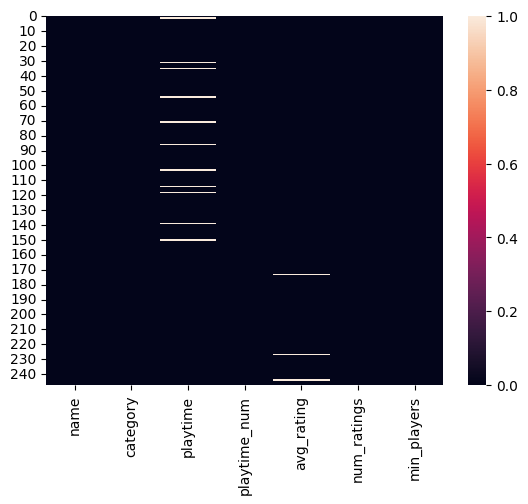

In [3]:
# Missing data heatmap
sns.heatmap(df.isnull())

In [4]:
# Null Rates by Column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

name - 0%
category - 0%
playtime - 4%
playtime_num - 0%
avg_rating - 1%
num_ratings - 0%
min_players - 0%


created missing indicator for: playtime
created missing indicator for: avg_rating


<Axes: xlabel='index'>

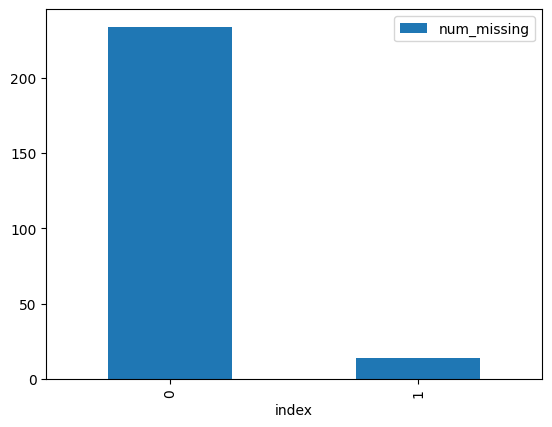

In [5]:
# Missing Data Histogram
for col in df.columns:
    # Counts missing rows in each column
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print(f'created missing indicator for: {col}')
        # creates new helper column to show null values
        df[f'{col}_ismissing'] = missing

# totals the nulls in each row using the new helper columns
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

#plots the histogram
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [6]:
df.head()

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players,playtime_ismissing,avg_rating_ismissing,num_missing
0,Agricola,Economic,>90,150,7.98857,61557,1,False,False,0
1,Puerto Rico,Economic,NaN,150,8.03590,61157,3,True,False,1
2,Small World,Fighting,"(60, 90]",800,7.29949,59211,2,False,False,0
3,Codenames,Deduction,<=30,15,7.71148,62563,2,False,False,0
4,Power Grid,Economic,>90,120,7.89004,54420,2,False,False,0


In [8]:
# reset the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/e3la/LC_Data_2023/main/Data_Cleaning/resources/popular_board_game.csv')
df.head()

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players
0,Agricola,Economic,>90,150,7.98857,61557,1
1,Puerto Rico,Economic,NaN,150,8.03590,61157,3
2,Small World,Fighting,"(60, 90]",800,7.29949,59211,2
3,Codenames,Deduction,<=30,15,7.71148,62563,2
4,Power Grid,Economic,>90,120,7.89004,54420,2


In [11]:
# From the prompt - I need 'Parks' in the dataset
# Check to see if 'Parks' is in the dataframe

df[df['name'] == 'Parks'].head()

#you have to do double df[df[]] to call the subset - explained here: https://stackoverflow.com/questions/57809139/python-pandas-select-condition-why-to-write-dataframe-name-twice-like-framefram

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players


In [17]:
# Add Parks to the dataframe
df.loc[len(df.index)] = ['Parks', 'Adventure', '', 45, 7.8, 12000, 1]
#.loc lets you look stuff up and add things to dataframes
#in data frame we are going to locate, using the length of the index to get the last record - to add to the end
#we've created a list to insert as a row, leaving a null value - when you insert this way, do not leave a null value - you'll end up with problems otherwise
df.tail()
#run df.tail to see the last 4 records
#you'll use loc a lot with dataframes

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players
249,Parks,Adventure,,45,7.8,12000,1
250,Parks,Adventure,,45,7.8,12000,1
251,Parks,Adventure,,45,7.8,12000,1
252,Parks,Adventure,,45,7.8,12000,1
253,Parks,Adventure,,45,7.8,12000,1


In [ ]:
# Look at the nulls
df1 = df[df.isna().any(axis=1)]
#using isna().any shows us any row that has a null value - some has it in playtime, some in average rating
df1.head(20)

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players
1,Puerto Rico,Economic,NaN,150,8.03590,61157,3
31,Cosmic Encounter,Bluffing,NaN,120,7.55528,26335,3
35,Cosmic Encounter,Bluffing,NaN,120,7.55528,26335,3
54,Elder Sign,Fighting,NaN,90,7.00506,21321,1
71,Isle of Skye: From Chieftain to King,Economic,NaN,50,7.45634,19015,2
86,Mr. Jack,Deduction,NaN,30,7.04544,14639,2
103,Dungeon Lords,Economic,NaN,90,7.41716,12623,2
114,Merchants & Marauders,Fighting,NaN,180,7.43596,12345,2
118,Pathfinder Adventure Card Game: Rise of the Ru...,Fighting,NaN,90,7.27195,11763,1
139,Skull,bluffing,NaN,45,7.17317,12818,3


In [18]:
# Check the shape
df.shape

(254, 7)

# Resolve the missing ratings

* A: Impute<br>
to impute the data, we're going to replace any empty after rating and fill it with the average rating of average ratings
* B: Drop Rows<br>
or we could drop some rows
* C: Lookup & Insert Actual Ratings<br>
research what should go in there and put it in there - Kelly has done this a lot with addresses, this is often the only way to deal with location info<br>

lots of ways to think about it
imputting does the least amount of 'damage' in this case

in this case, we're going to go with impute



In [19]:
# # A: Impute
df['avg_rating'] = df['avg_rating'].fillna(df['avg_rating'].mean())
df['avg_rating'].isnull().sum()

0

In [ ]:
# # B: Drop Rows
# df = df.dropna(subset = ['avg_rating'])
# df.shape

In [ ]:
# # C: Lookup & Replace
# index = df.index[df['name'] == 'Viticulture']
# df.at[index, 'avg_rating'] == #new rating
# df['avg_rating'].isnull().sum

# Resolve the missing playtime values

* A: Replace Values
* B: Drop Rows
* C: Drop Column
* D: Ignore for now...

Playtime are categories, with a cut function
we can replace all the playtime with the cut values
or we could
drop rows
or
we could drop the playtime number I would probably go with that since it is ~ to duplicate data
or
ignore it for now

In [ ]:
# # A: Replace Values
# df['playtime'] = pd.cut(df['playtime_num'], [0,30,60,90,9000])
# df['playtime'].isnull().sum()

0

In [ ]:
# # B: Drop Rows
# df = df.dropna(subset = ['playtime'])
# df.shape

# df = df.dropna(subset = ['avg_rating'])
# df.shape

In [20]:
# # C: Drop Column
df.drop('playtime', axis=1, inplace = True)
df.head()

,name,category,playtime_num,avg_rating,num_ratings,min_players
0,Agricola,Economic,150,7.98857,61557,1
1,Puerto Rico,Economic,150,8.03590,61157,3
2,Small World,Fighting,800,7.29949,59211,2
3,Codenames,Deduction,15,7.71148,62563,2
4,Power Grid,Economic,120,7.89004,54420,2


In [ ]:
# D: Ignore for now...

In [22]:
# Look at the nulls
df1 = df[df.isna().any(axis=1)]
df1.head(20)

,name,category,playtime_num,avg_rating,num_ratings,min_players


<Axes: >

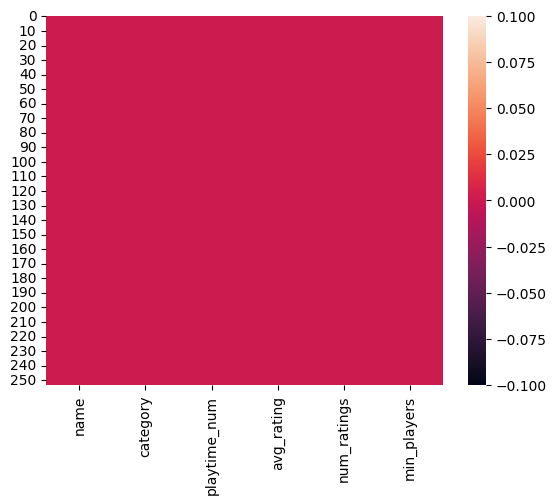

In [23]:
sns.heatmap(df.isnull())

# Section 2: Outliers

# Find Outliers

* Histograms
* Boxplots
* Descriptive Statistics

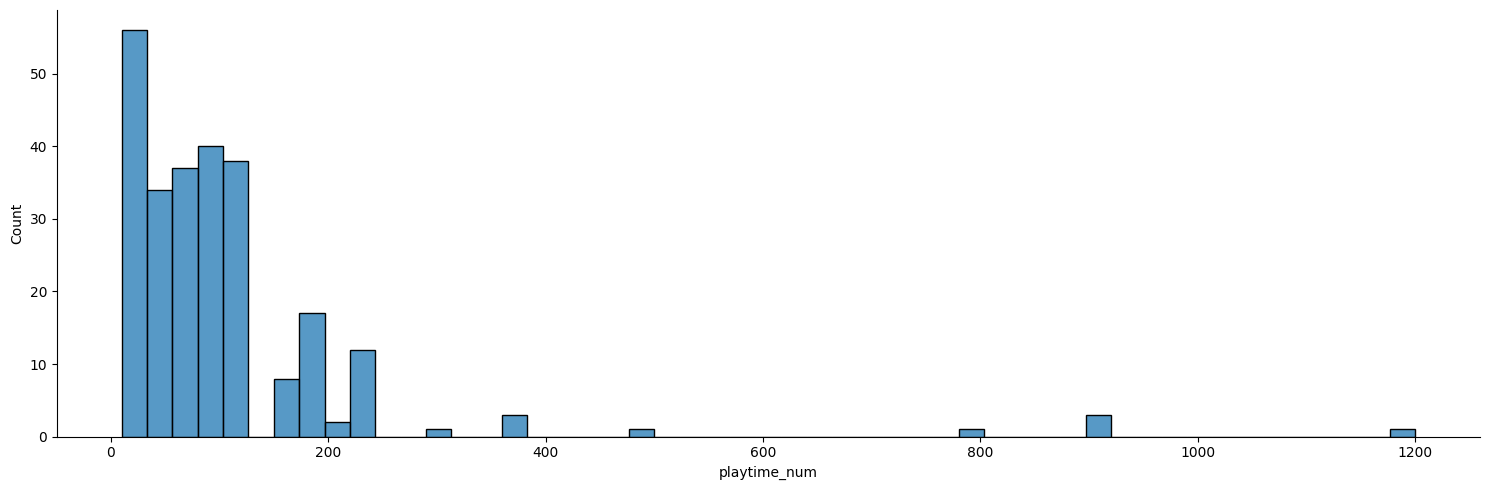

In [21]:
#Histograms
sns.displot(data=df, x='playtime_num', height = 5, aspect = 3)
#this is a right skewed - most games are below 200 minutes

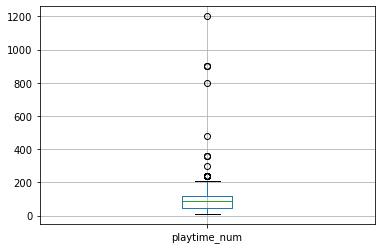

In [ ]:
# Boxplots
df.boxplot(column=['playtime_num'])

In [ ]:
# Descriptive Statistics
df['playtime_num'].describe()

count     249.000000
mean      109.485944
std       139.902158
min        10.000000
25%        45.000000
50%        90.000000
75%       120.000000
max      1200.000000
Name: playtime_num, dtype: float64

In [ ]:
#Look at the Outlier rows
df[df['playtime_num'] > 300].head(20)

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players
2,Small World,Fighting,"(90, 9000]",800,7.29949,59211,2
14,Arkham Horror,Fighting,"(90, 9000]",360,7.29157,36102,1
24,Blood Rage,Fighting,"(90, 9000]",900,8.03108,31455,2
27,Tzolk'in: The Mayan Calendar,Economic,"(90, 9000]",900,7.92748,28786,2
80,Alchemists,Deduction,"(90, 9000]",1200,7.69764,17270,2
119,Diplomacy,Bluffing,"(90, 9000]",360,7.05243,11810,2
158,Small World Underground,fighting,"(90, 9000]",900,7.29991,9446,2
207,Civilization,economic,"(90, 9000]",360,7.51239,7007,2
212,Twilight Imperium (Fourth Edition),economic,"(90, 9000]",480,8.72044,11474,3


In [ ]:
# Look at the Outlier rows
df.nlargest(10, 'playtime_num')

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players
80,Alchemists,Deduction,"(90, 9000]",1200,7.69764,17270,2
24,Blood Rage,Fighting,"(90, 9000]",900,8.03108,31455,2
27,Tzolk'in: The Mayan Calendar,Economic,"(90, 9000]",900,7.92748,28786,2
158,Small World Underground,fighting,"(90, 9000]",900,7.29991,9446,2
2,Small World,Fighting,"(90, 9000]",800,7.29949,59211,2
212,Twilight Imperium (Fourth Edition),economic,"(90, 9000]",480,8.72044,11474,3
14,Arkham Horror,Fighting,"(90, 9000]",360,7.29157,36102,1
119,Diplomacy,Bluffing,"(90, 9000]",360,7.05243,11810,2
207,Civilization,economic,"(90, 9000]",360,7.51239,7007,2
19,Battlestar Galactica: The Board Game,Bluffing,"(90, 9000]",300,7.74082,32005,3


# Resolve the Outliers

* A: Modify Outlier Values
* B: Drop Rows
* C: Flag Outliers

In [ ]:
# # A: Modify Outlier Values
# df['playtime_num'] = df['playtime_num'].replace({1200:120, 900:90, 800:90})
# df.nlargest(10, 'playtime_num')

In [ ]:
# # B: Drop Rows
# indexNames = df[df['playtime_num'] > 500].index
# df.drop(indexNames, inplace=True)
# df.nlargest(10, 'playtime_num')

In [ ]:
# C: Flag Outliers
df['outlier'] = df['playtime_num'] > 500
df.nlargest(10, 'playtime_num')

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players,outlier
80,Alchemists,Deduction,"(90, 9000]",1200,7.69764,17270,2,True
24,Blood Rage,Fighting,"(90, 9000]",900,8.03108,31455,2,True
27,Tzolk'in: The Mayan Calendar,Economic,"(90, 9000]",900,7.92748,28786,2,True
158,Small World Underground,fighting,"(90, 9000]",900,7.29991,9446,2,True
2,Small World,Fighting,"(90, 9000]",800,7.29949,59211,2,True
212,Twilight Imperium (Fourth Edition),economic,"(90, 9000]",480,8.72044,11474,3,False
14,Arkham Horror,Fighting,"(90, 9000]",360,7.29157,36102,1,False
119,Diplomacy,Bluffing,"(90, 9000]",360,7.05243,11810,2,False
207,Civilization,economic,"(90, 9000]",360,7.51239,7007,2,False
19,Battlestar Galactica: The Board Game,Bluffing,"(90, 9000]",300,7.74082,32005,3,False


# Unnecessary Data

# Find Irrelevant Data

* Column Diversity
* Detect Duplicates
* Consider Relevance

In [ ]:
df['category'].value_counts()

Economic      57
Fighting      49
Bluffing      31
economic      31
fighting      21
bluffing      19
Deduction     17
Party Game    15
deduction      5
party game     3
Adventure      1
Name: category, dtype: int64

In [ ]:
dupes = df.duplicated()
dupes.sum()

4

In [ ]:
df.drop_duplicates(inplace = True)
dupes = df.duplicated()
dupes.sum()

0

In [ ]:
# Check for duplicates in the ID column
df['name'].value_counts()

Codenames                     2
Jambo                         1
Spirit Island                 1
King of Tokyo                 1
Food Chain Magnate            1
                             ..
Space Hulk (third edition)    1
Schotten Totten               1
Mascarade                     1
Spyfall                       1
Sheriff of Nottingham         1
Name: name, Length: 244, dtype: int64

In [ ]:
df[df['name'] == 'Codenames'].head()

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players,outlier
3,Codenames,Deduction,"(0, 30]",15,7.71148,62563,2,False
9,Codenames,Party Game,"(0, 30]",30,7.29405,47812,3,False


In [ ]:
df.drop_duplicates(subset = ['name'], inplace = True)
df[df['name'] == 'Codenames'].head()

,name,category,playtime,playtime_num,avg_rating,num_ratings,min_players,outlier
3,Codenames,Deduction,"(0, 30]",15,7.71148,62563,2,False


# Remove Irrelevant Data

* Drop ___ Column
* A: playtime
* B: playtime_num
* C: num_ratings

In [ ]:
df.drop(['playtime_num', 'num_ratings'], axis=1, inplace=True)
df.head()

,name,category,playtime,avg_rating,min_players,outlier
0,Agricola,Economic,"(90, 9000]",7.98857,1,False
1,Puerto Rico,Economic,"(90, 9000]",8.03590,3,False
2,Small World,Fighting,"(90, 9000]",7.29949,2,True
3,Codenames,Deduction,"(0, 30]",7.71148,2,False
4,Power Grid,Economic,"(90, 9000]",7.89004,2,False


In [ ]:
df.shape

(244, 6)

In [ ]:
# The family only has 4 people, so I don't need games that require 5+
df = df[df.min_players < 5]
df.shape

(240, 6)

# Section 4: Inconsistant Data

In [ ]:
df['category'].value_counts()

Economic      57
Fighting      48
economic      31
Bluffing      25
fighting      21
bluffing      18
Deduction     17
Party Game    14
deduction      5
party game     3
Adventure      1
Name: category, dtype: int64

# Group Category Values

* A: upper()
* B: lower()
* C: replace()

In [ ]:
# # upper()
# df['category'] = df['category'].str.upper()
# df['category'].value_counts()

In [ ]:
# # lower()
# df['category'] = df['category'].str.lower()
# df['category'].value_counts()

In [ ]:
# replace()
df['category'] = df['category'].replace({'Economic': 'economic', 'Fighting': 'fighting', 'Bluffing': 'bluffing',
                                         'Deduction': 'deduction', 'Party Game': 'party game', 'Adventure': 'adventure'})
df['category'].value_counts()

economic      88
fighting      69
bluffing      43
deduction     22
party game    17
adventure      1
Name: category, dtype: int64